In [18]:
import numpy as np
import pandas as pd

Carregando os dados e jogando numa Dataframe


In [ ]:
#pegando a tabela em cs, lendo pelo pandas e jogando num dataframe
df=pd.read_csv('agricultural_raw_material.csv')

Explorando o conjunto de dados


In [77]:
print('Tabela')
df.info()
print('Celulas vazias somadas')
df.isnull().sum()

Tabela
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 1990-05-01 to 2017-06-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             326 non-null    float64
 1   Coarse wool price % Change    326 non-null    float64
 2   Copra Price                   326 non-null    float64
 3   Copra price % Change          326 non-null    float64
 4   Cotton Price                  326 non-null    float64
 5   Cotton price % Change         326 non-null    float64
 6   Fine wool Price               326 non-null    float64
 7   Fine wool price % Change      326 non-null    float64
 8   Hard log Price                326 non-null    float64
 9   Hard log price % Change       326 non-null    float64
 10  Hard sawnwood Price           326 non-null    float64
 11  Hard sawnwood price % Change  326 non-null    float64
 12  Hide Price                    326 non-

Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

Tratamento de de dados ausentes, incorretos e invalidos


In [ ]:
#Substituindo %, "," e "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)
#Excluindo celulas com valor NaN
df = df.dropna()
#checando se há algum valor Nan na tabela
df.isnull().sum()
#convertendo os tipos de dados para float
list = ["Coarse wool Price","Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton Price", "Cotton price % Change", "Fine wool Price", "Fine wool price % Change", "Hard log Price", "Hard log price % Change", "Hard sawnwood Price", "Hard sawnwood price % Change", "Hide Price", "Hide price % change", "Plywood Price", "Plywood price % Change", "Rubber Price", "Rubber price % Change", "Softlog Price", "Softlog price % Change", "Soft sawnwood Price", "Soft sawnwood price % Change", "Wood pulp Price", "Wood pulp price % Change"]
df[list] = df[list].astype('float')
df.dtypes

In [43]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


Coluna data e hora


In [44]:
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
#indexando o mes
df = df.set_index('Month')

In [45]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


Analise exploratoria e visualização com **matplotlib.pyplot e seaborn**

In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

matplotlib.rcParams.update({
    'font.size': 14,
    'figure.figsize': (9, 5),
    'figure.facecolor': '#00000000'
})

**Mapa de calor**

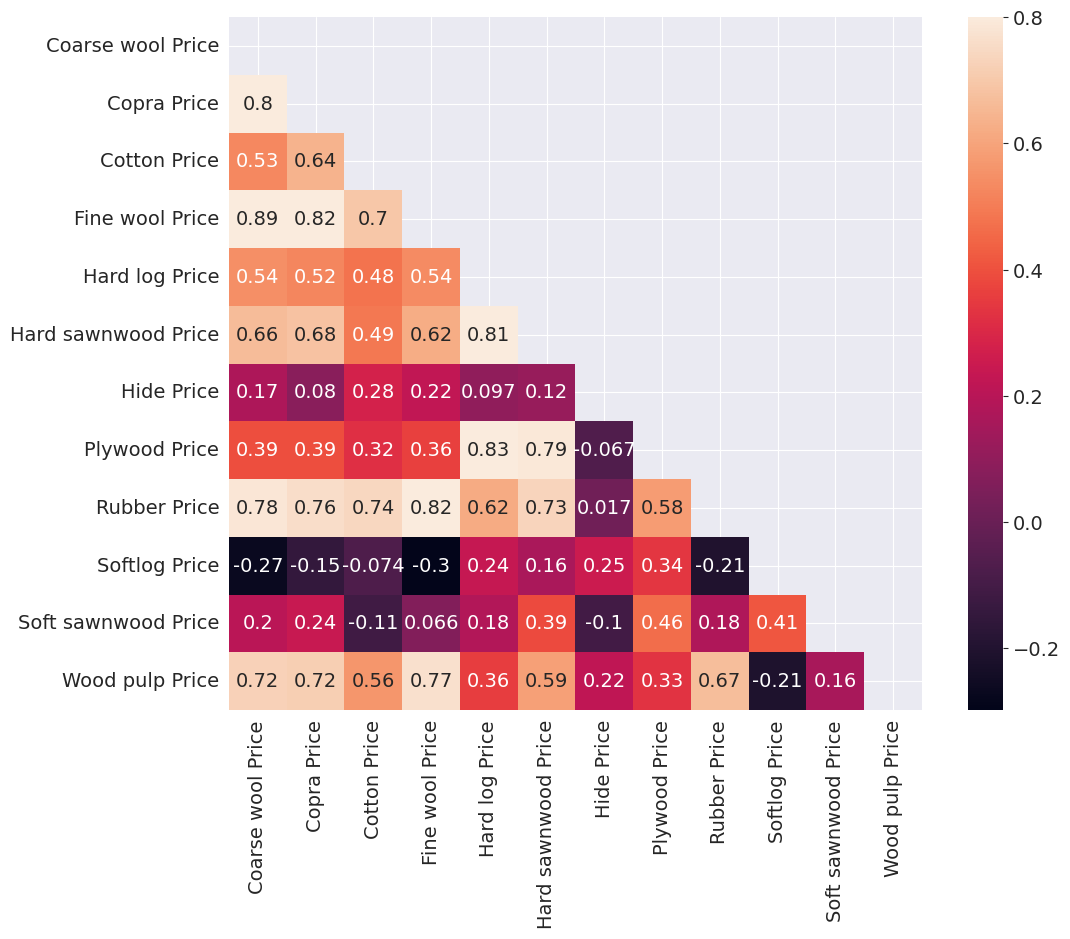

In [49]:
#lista dos materiais
raw_data=["Coarse wool Price", "Copra Price", "Cotton Price", "Fine wool Price",  "Hard log Price",
          "Hard sawnwood Price", "Hide Price", "Plywood Price", "Rubber Price", "Softlog Price",
          "Soft sawnwood Price", "Wood pulp Price"]
#obtendo a relação matriz
corrmat = df[raw_data].corr()
#Configurando o tamanho da plotagem
fig = plt.figure(figsize = (12,9))
#mascarando a parte superior do triângulo, pois a matriz é simétrica
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8, mask=mask, square=True, annot=True)
plt.show()


Traçando um grafico da matriz de correlação (variação da porcetagem)

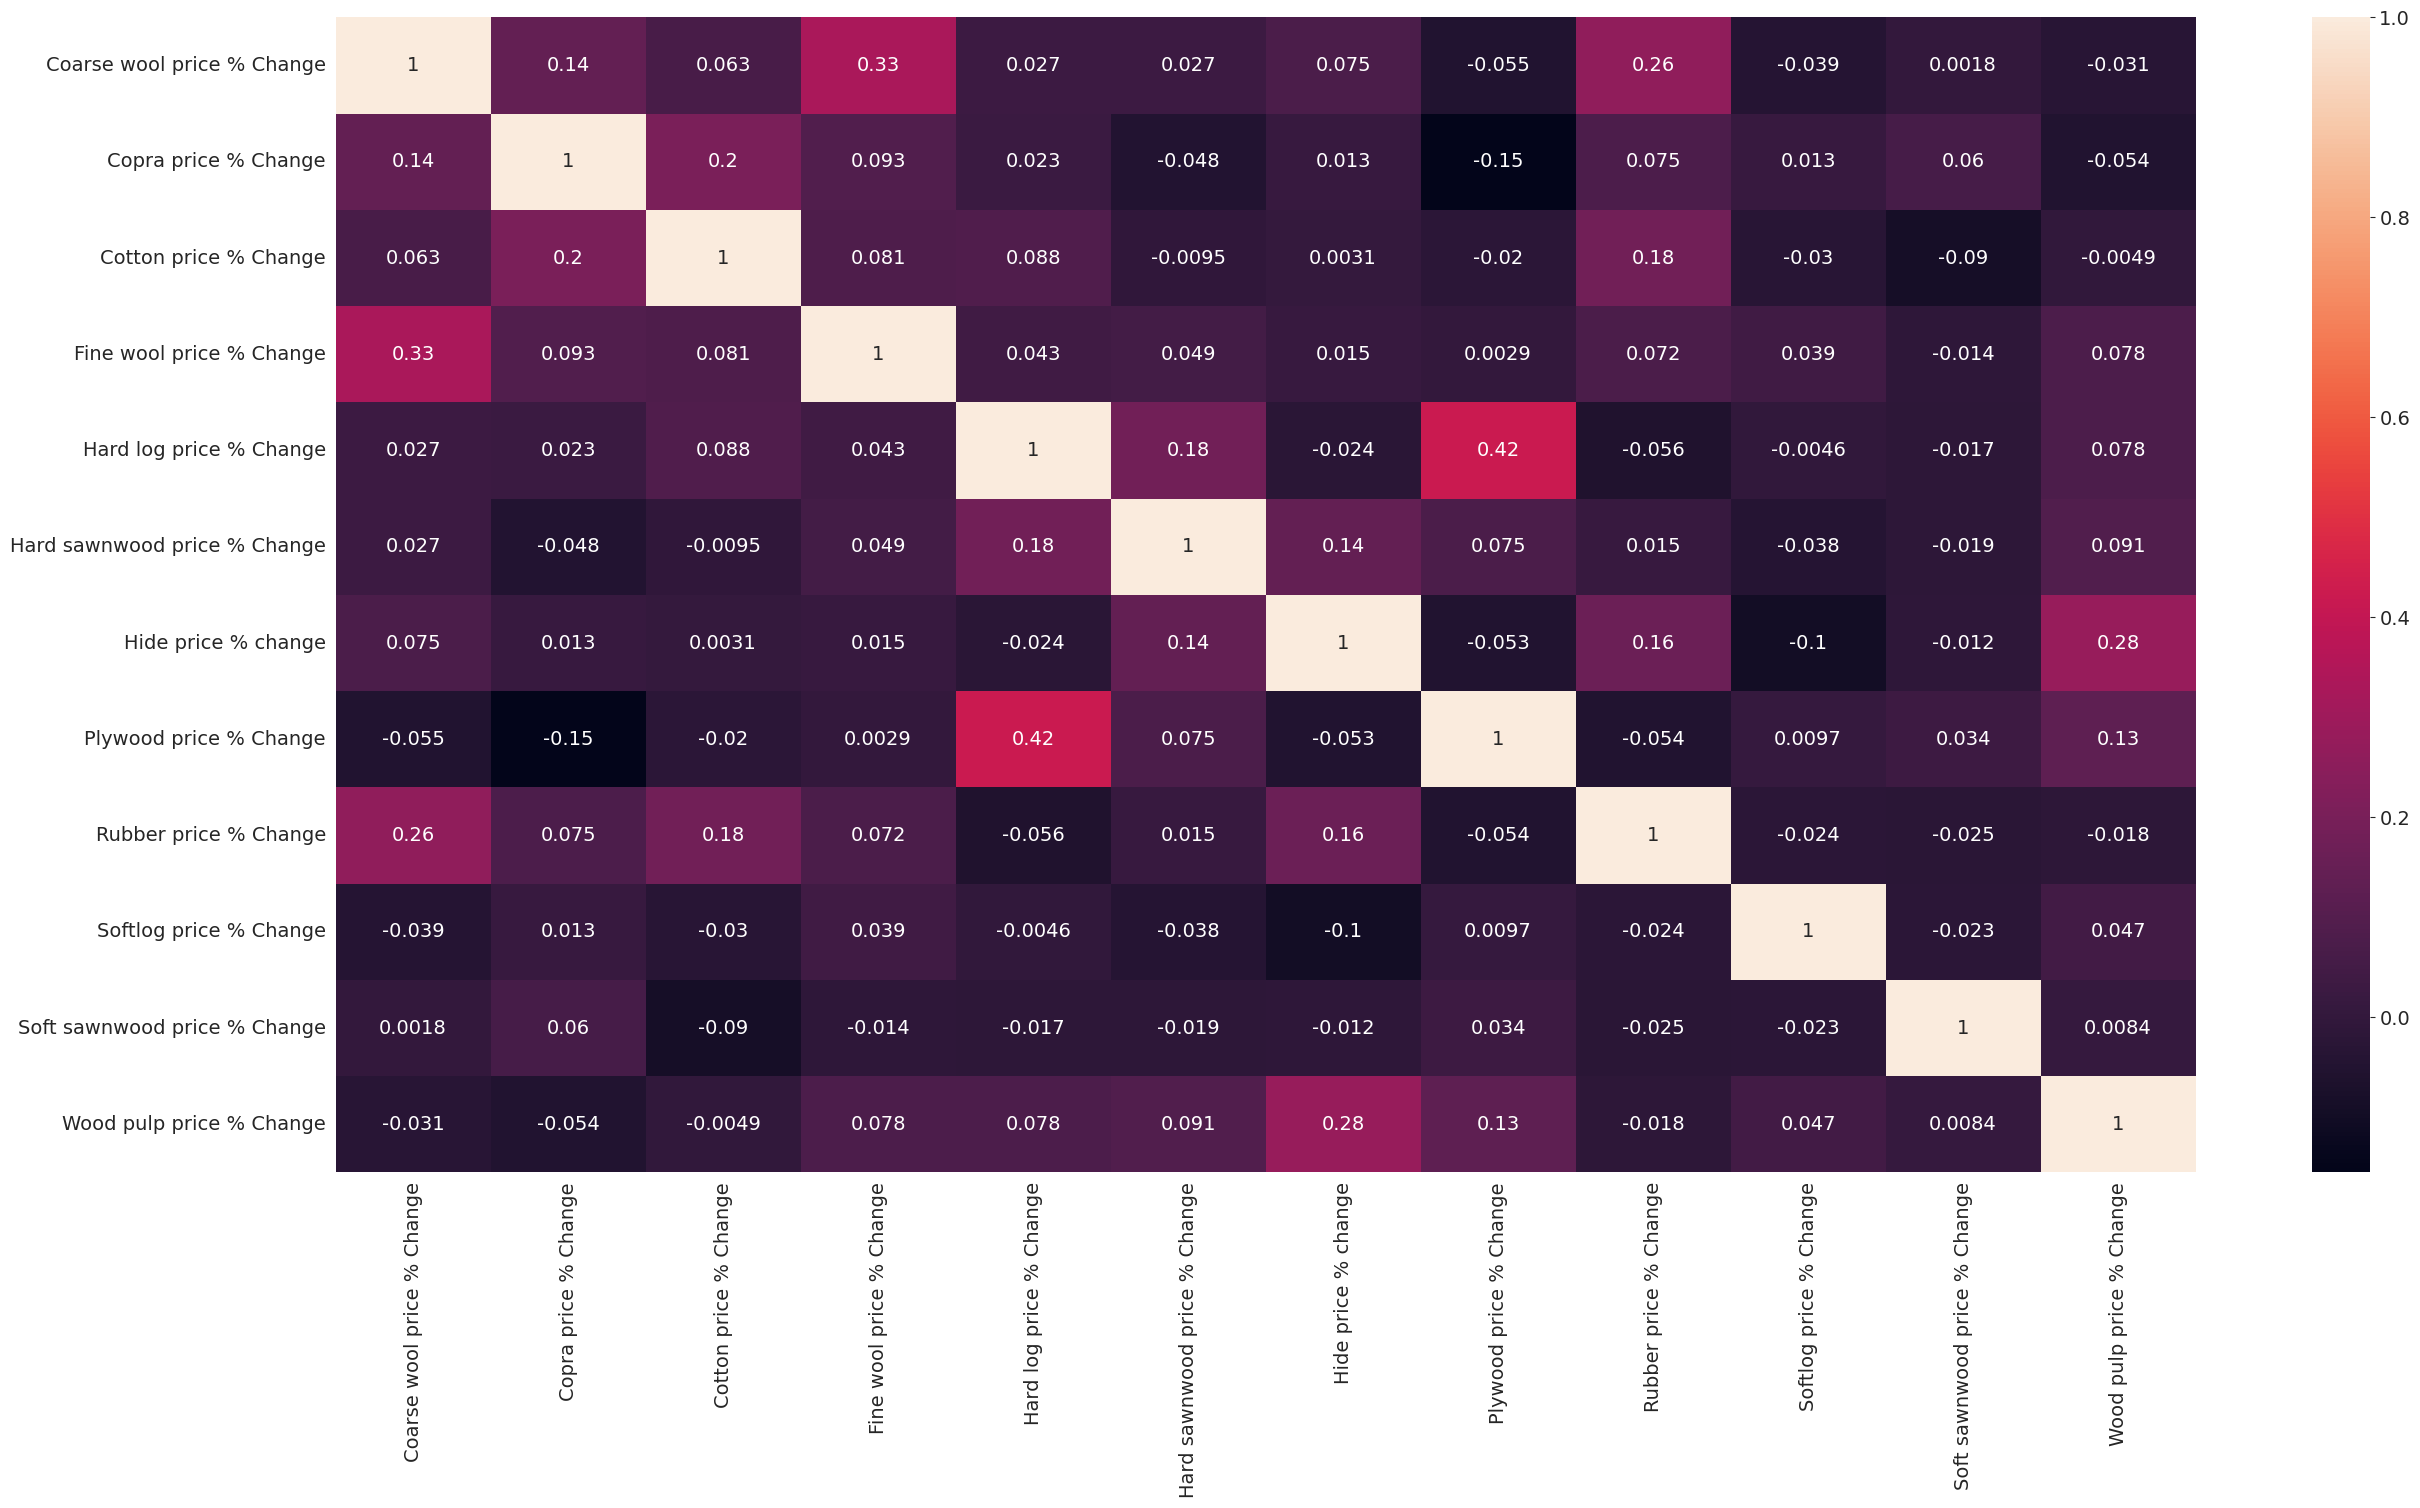

Nenhuma correlação forte. (nenhuma acima de 0.7)


In [51]:
plt.figure(figsize=(30,15))
changelist=["Coarse wool price % Change", "Copra price % Change",  "Cotton price % Change",
            "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change",
            "Hide price % change", "Plywood price % Change", "Rubber price % Change",  "Softlog price % Change",
            "Soft sawnwood price % Change", "Wood pulp price % Change"]
#gerando uma matriz de correlação para todo o dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas
- valor negativo implica que duas vanáves estilo negativamente correlacionadas (um aumento, outro decréscimo)
- Zero implica relação alguma
- caso contrario, maior o valor maior a chance de relação. preços e seus gráficos de % de mudança.

Ou seja **correlação negativa**

### **Lã grossa**

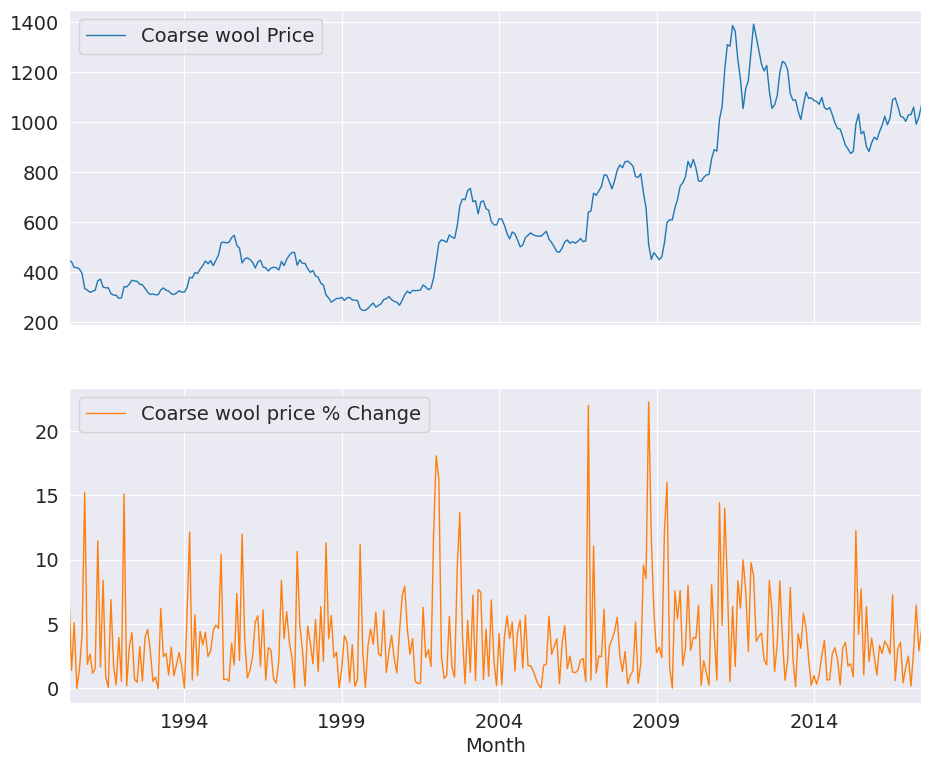

In [61]:
#subplot para separar em duas colunas
axes = df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Descobrindo a variação normal do preço de cada materia prima

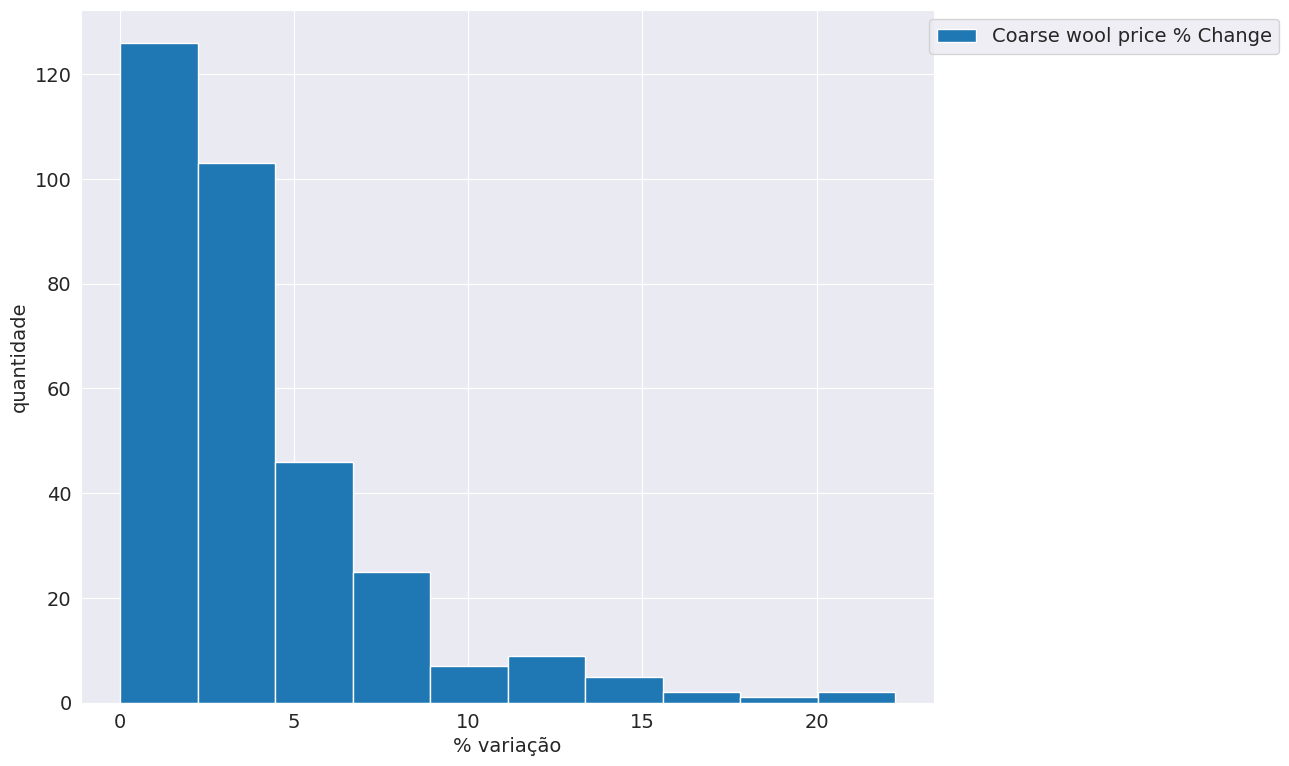

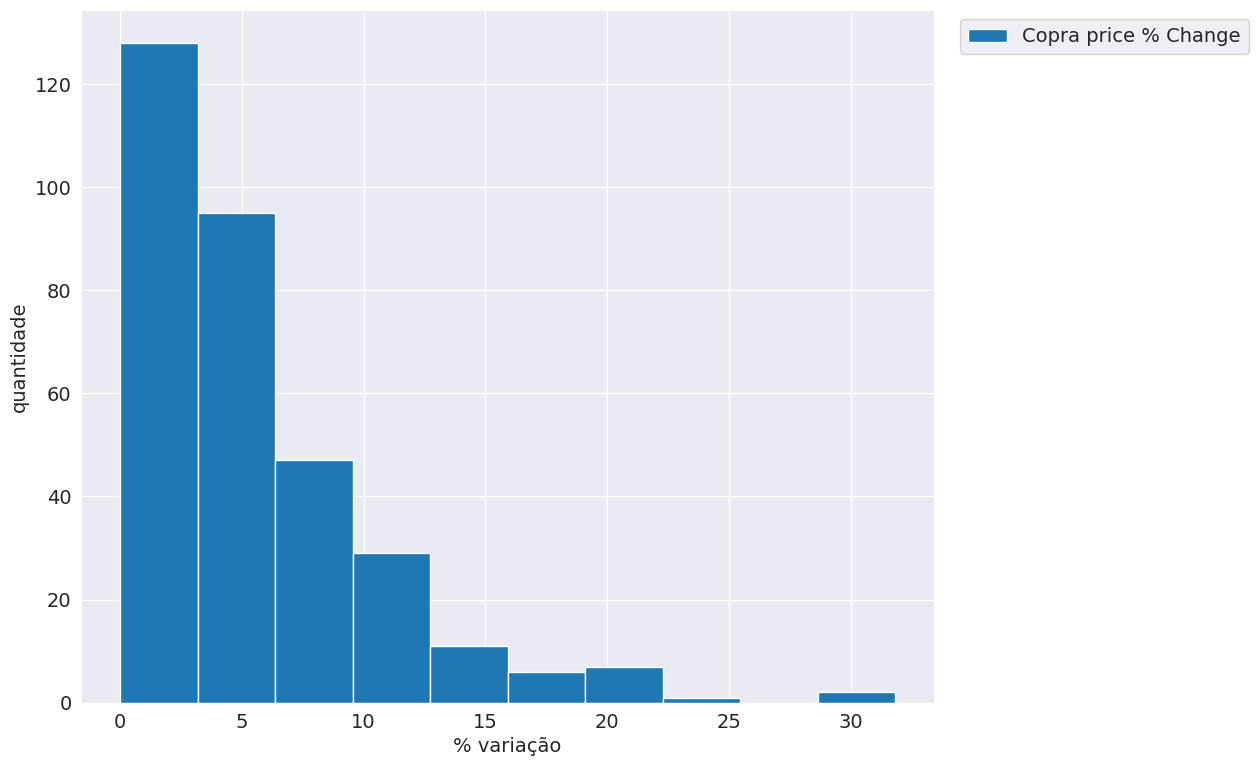

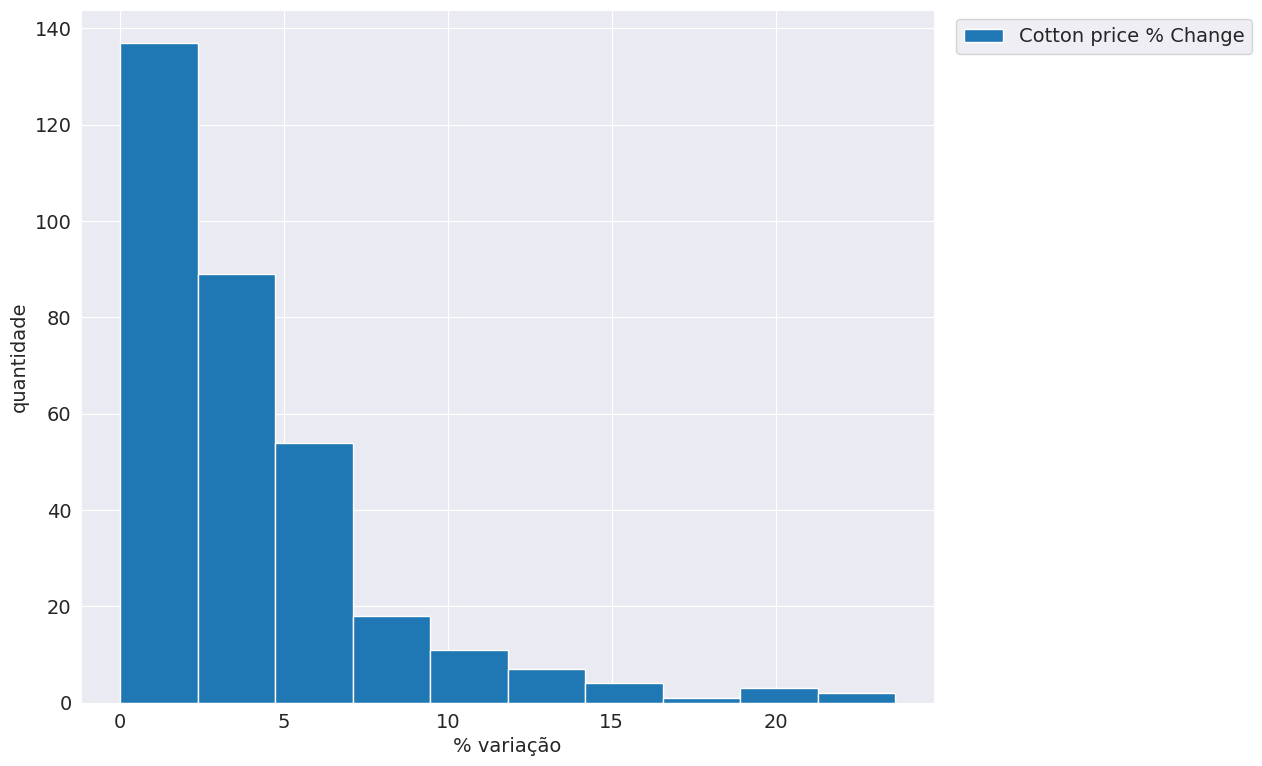

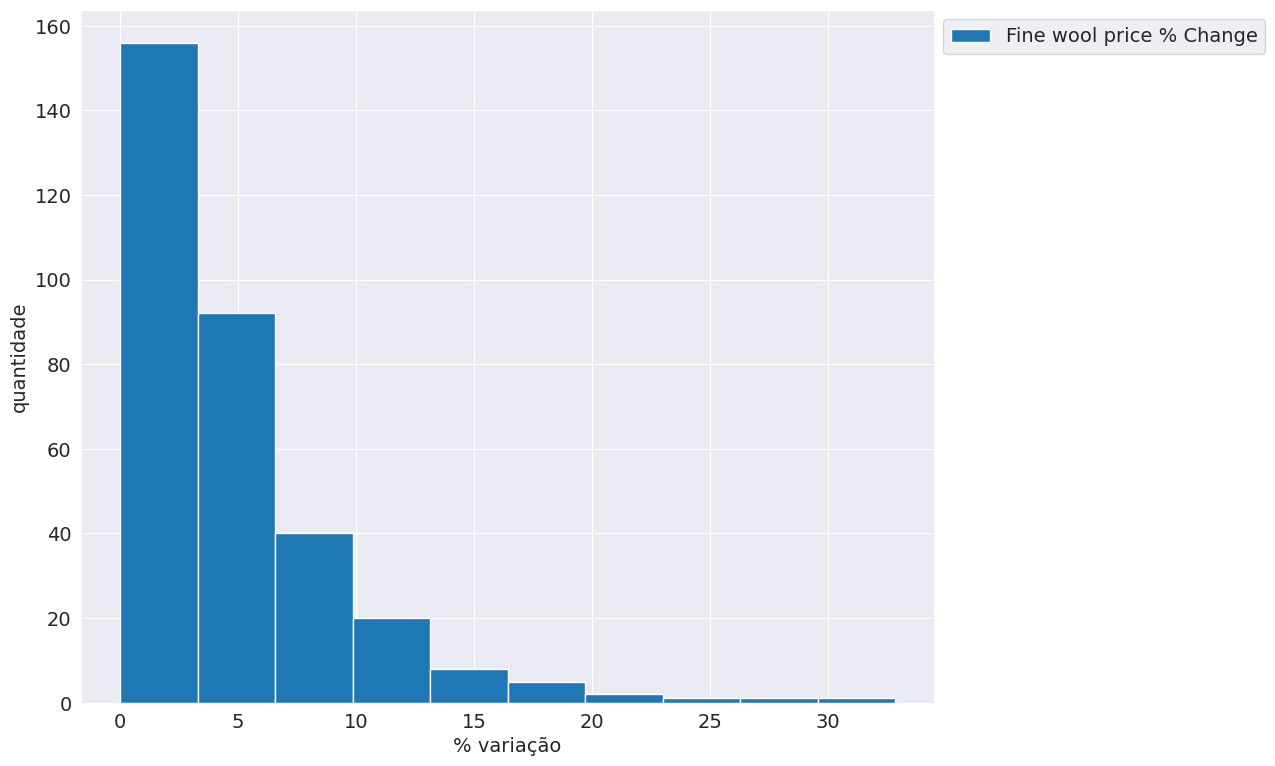

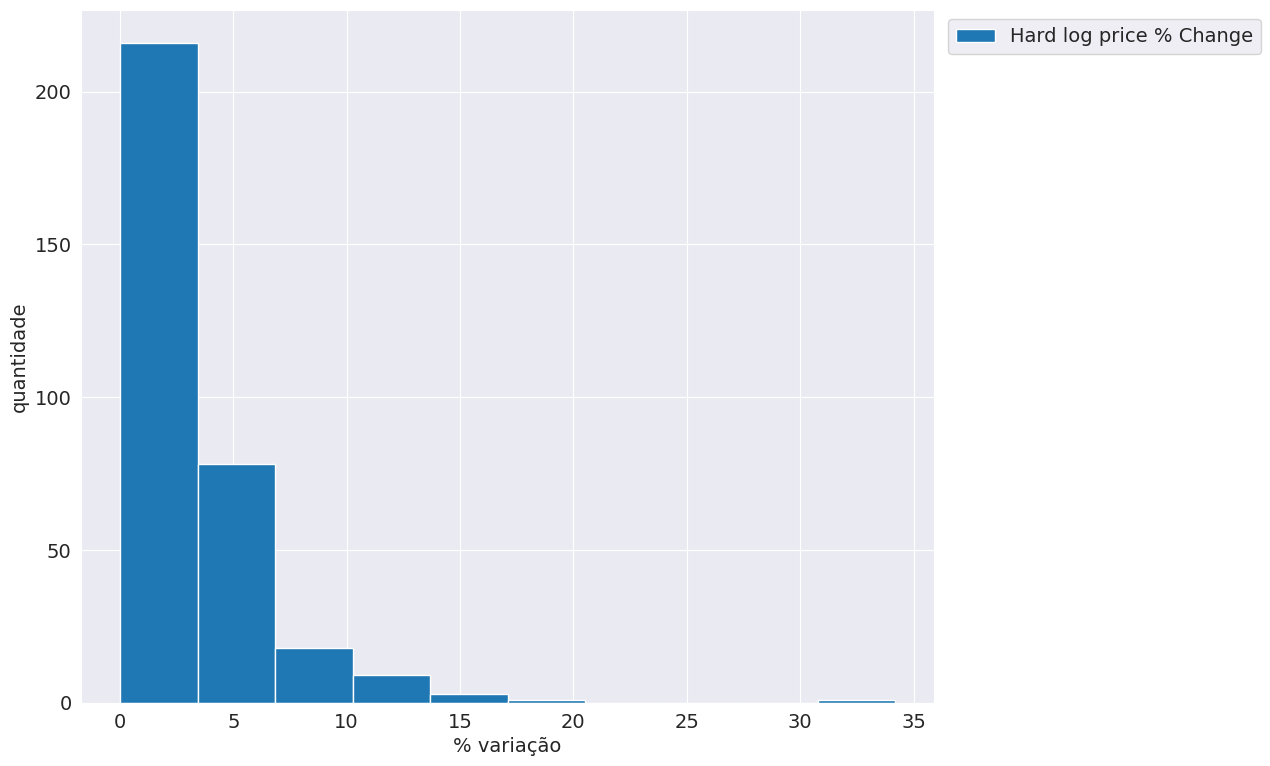

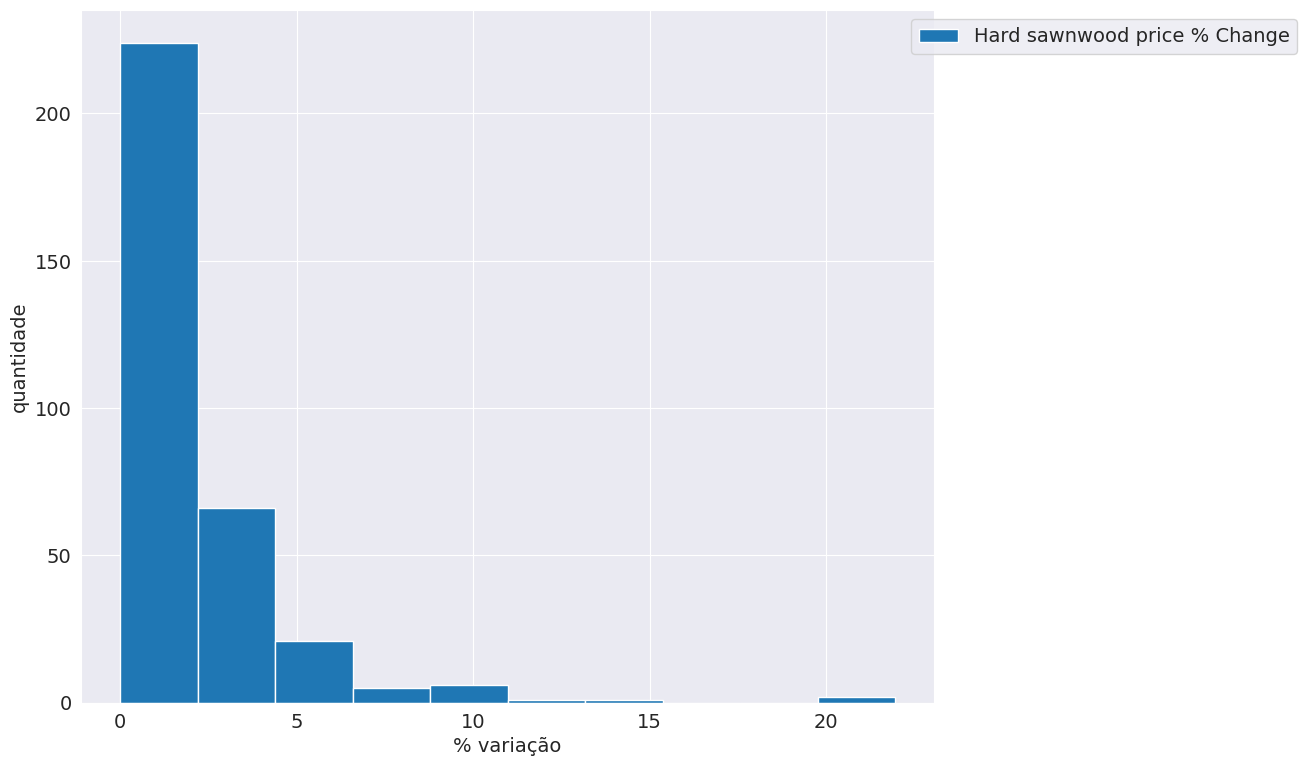

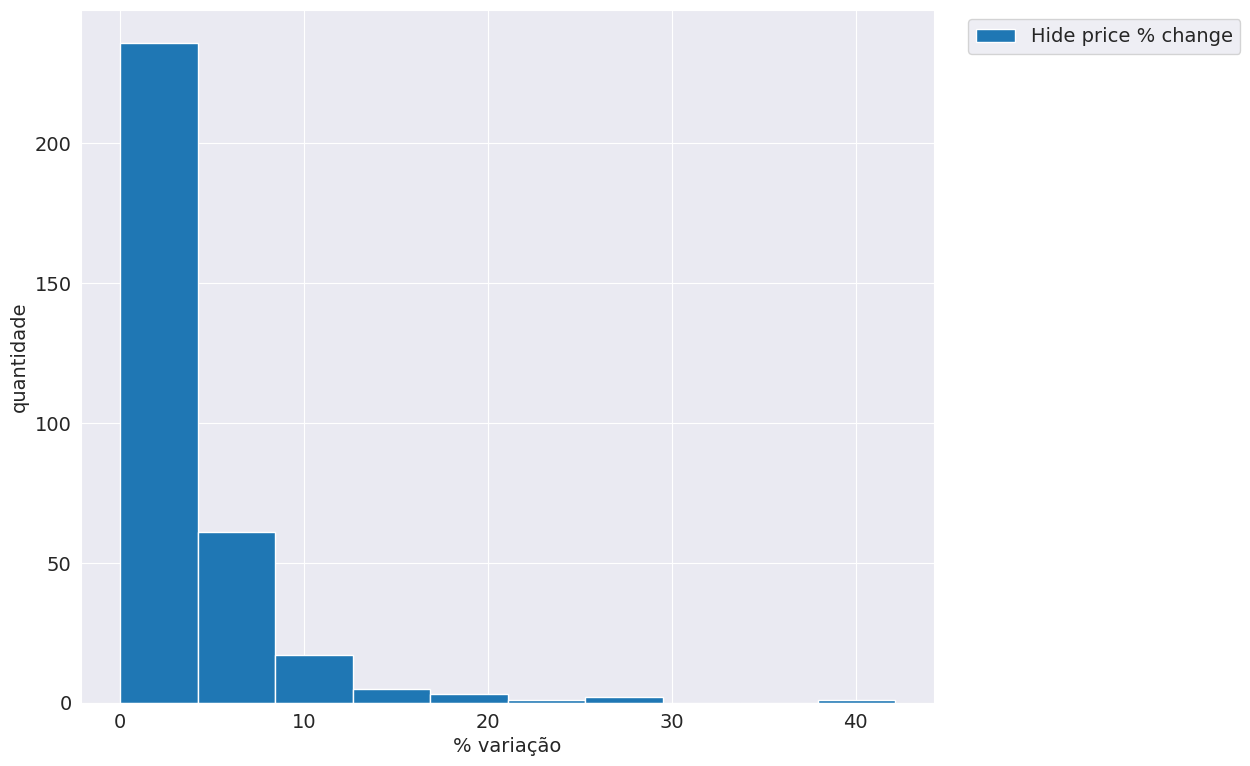

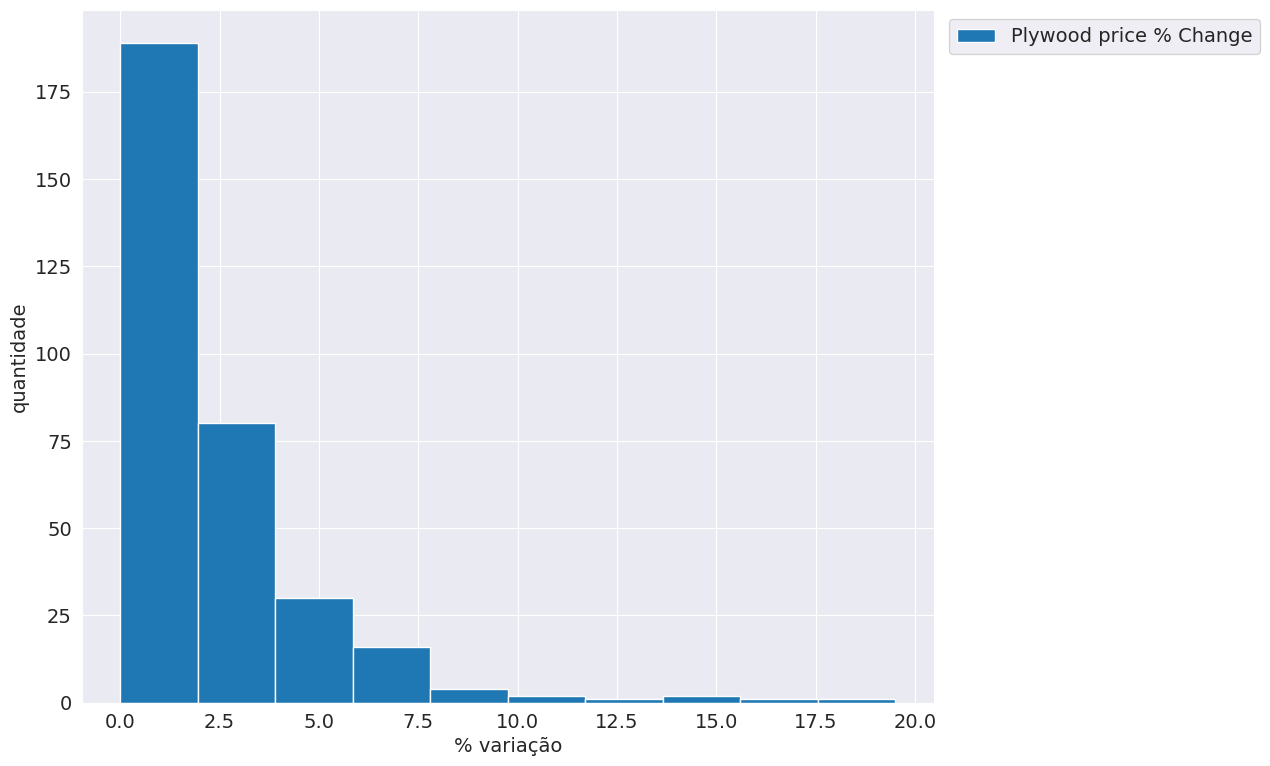

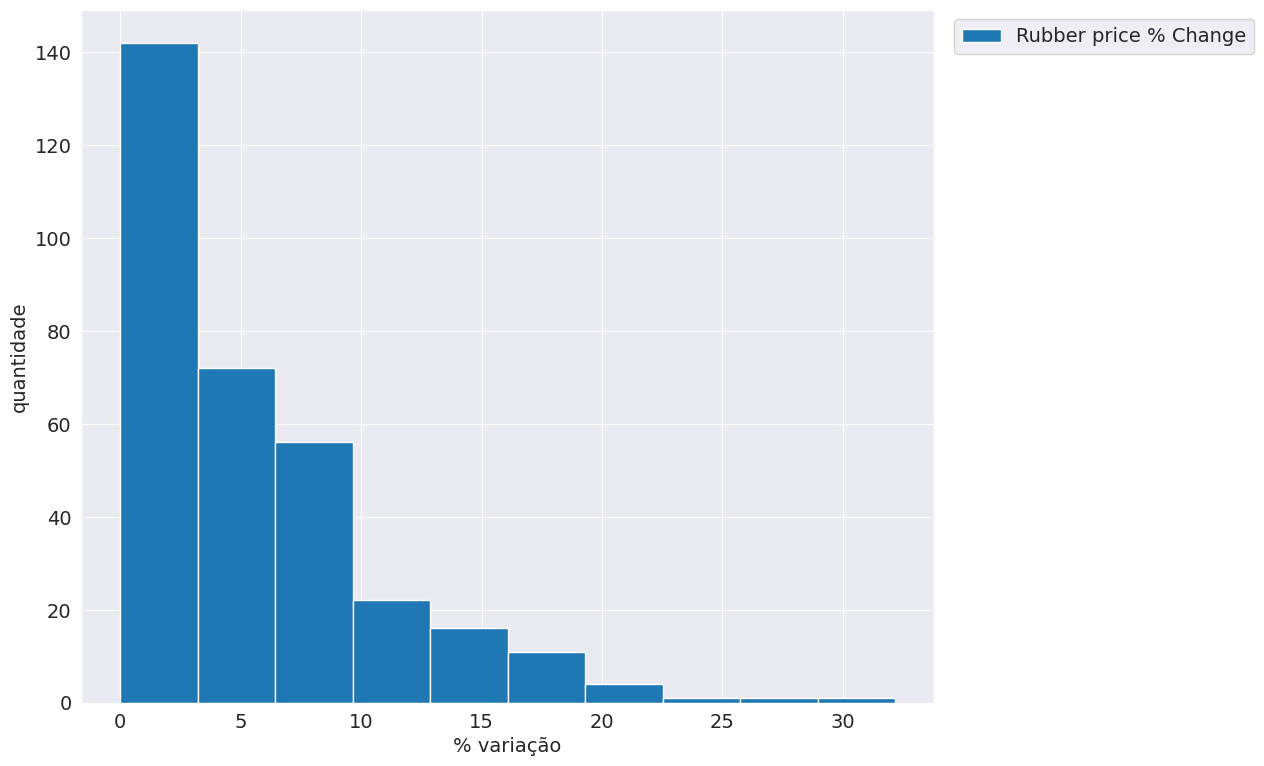

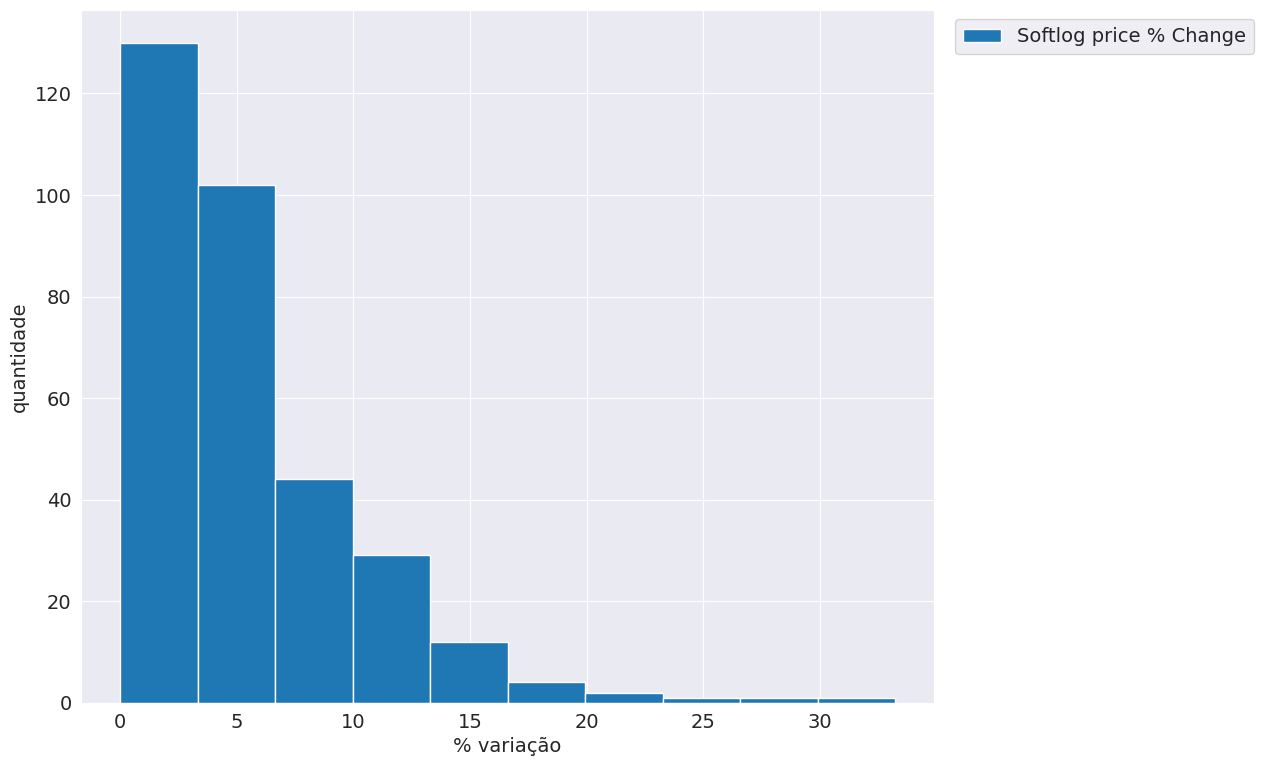

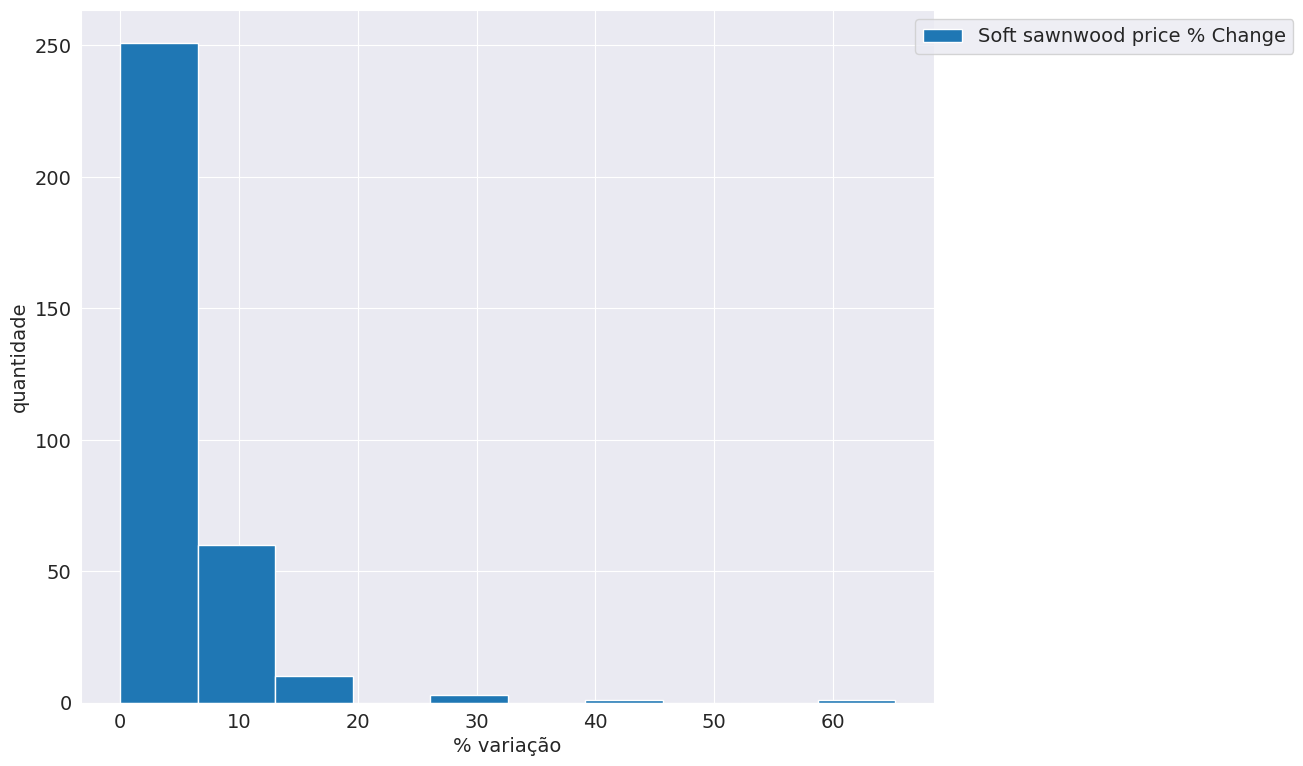

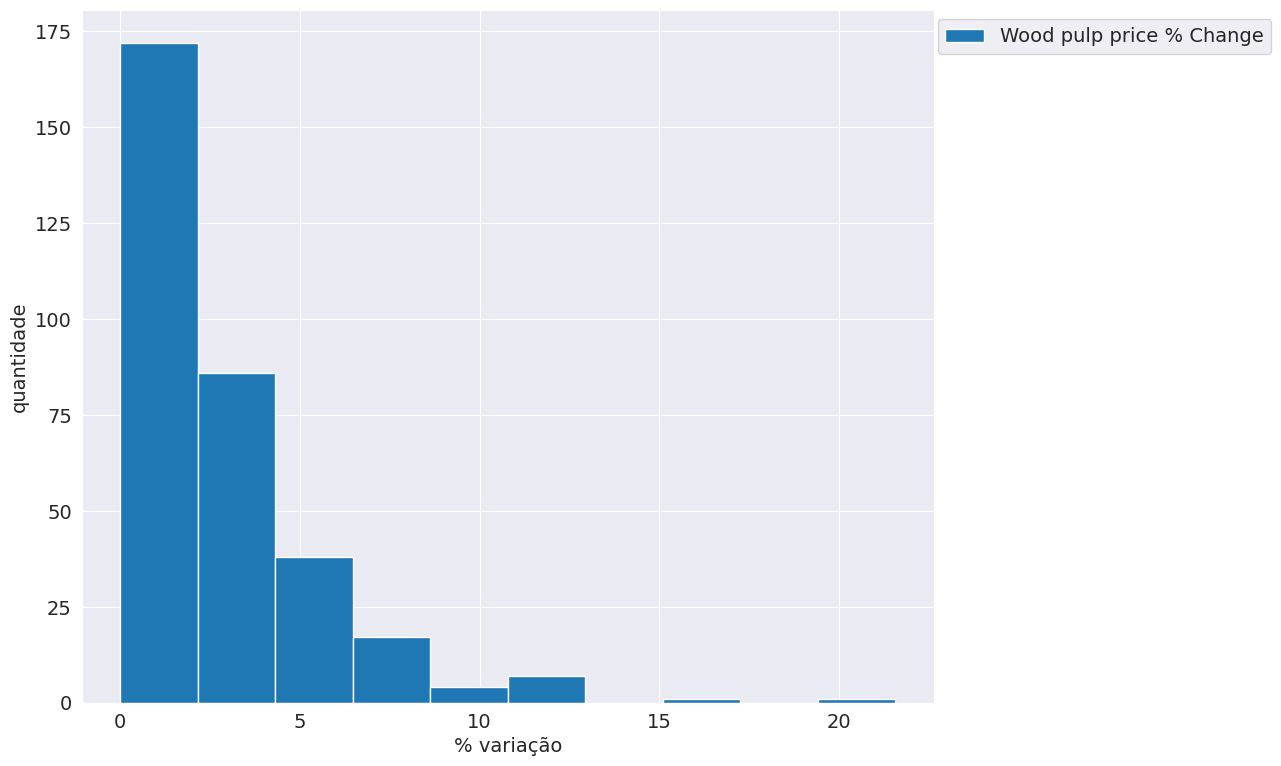

In [64]:
changelist=["Coarse wool price % Change", "Copra price % Change",  "Cotton price % Change",
            "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change",
            "Hide price % change", "Plywood price % Change", "Rubber price % Change",  "Softlog price % Change",
            "Soft sawnwood price % Change", "Wood pulp price % Change"]
for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11,9), linewidth=1)
    plt.xlabel('% variação')
    plt.ylabel('quantidade')
    plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2,1))

Podemos observar que a maioria das matérias-primas tem % de mudança de idel inferior a 5%

Text(0.5, 0.98, 'comparação de preço Matéria-prima')

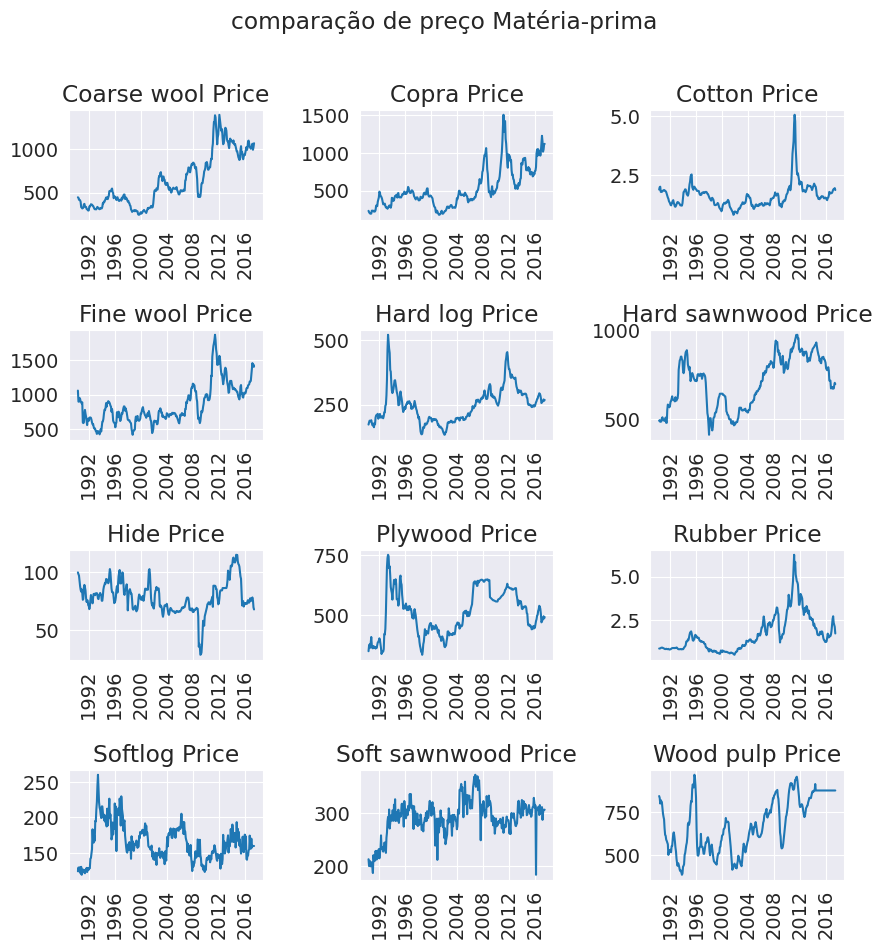

In [68]:
plt.figure(figsize=(10,10))
materialist=["Coarse wool Price", "Copra Price", "Cotton Price", "Fine wool Price",  "Hard log Price",
          "Hard sawnwood Price", "Hide Price", "Plywood Price", "Rubber Price", "Softlog Price",
          "Soft sawnwood Price", "Wood pulp Price"]
for i in range(len(materialist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=1,wspace=0.5)
    plt.title(materialist[i])
    plt.plot(df[materialist[i]])
    plt.xticks(rotation=90)
plt.suptitle("comparação de preço Matéria-prima")

Podemos notar que o algodão e a borracha são os produtos mais barato.
Vamos analise e descobrir qual o mais barato.

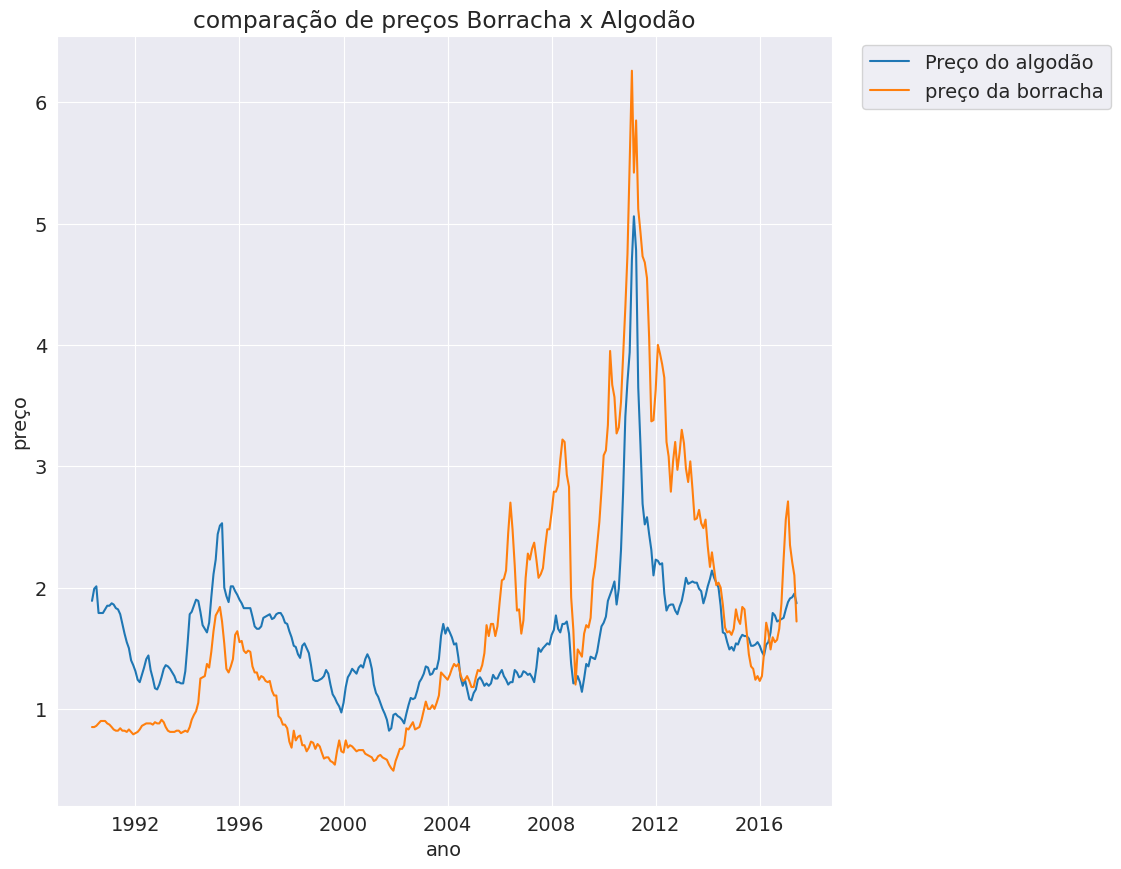

In [70]:
plt.figure(figsize=(10,10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title("comparação de preços Borracha x Algodão")
plt.xlabel('ano')
plt.ylabel('preço')
plt.legend(['Preço do algodão', 'preço da borracha'], loc='upper center', bbox_to_anchor=(1.2,1))

Atualmente o Algodão é a **materia-prima mais barata.**

# **Agora, qual materia prima tem a menor variação de preço**

Text(0.5, 0.98, 'variação de preço da Matéria-prima')

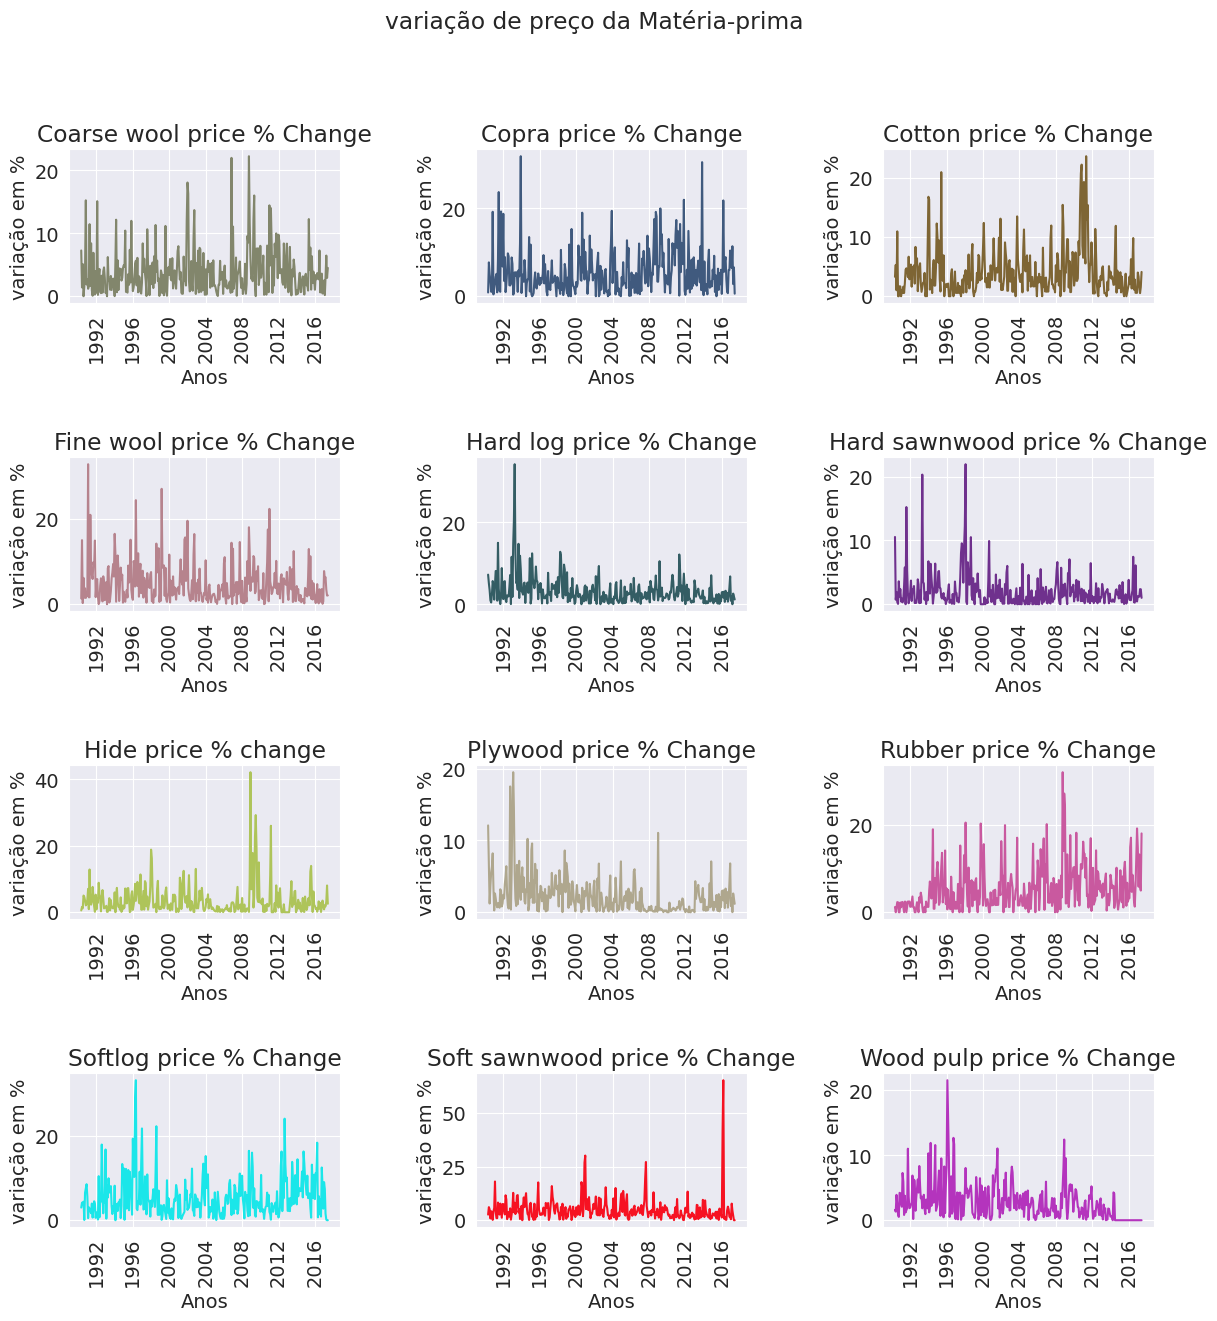

In [72]:
import random as random

plt.figure(figsize=(14,14))
for i in range(len(changelist)):
  r = random.random()
  g = random.random()
  b = random.random()
  color = (r,g,b)
  plt.subplot(4,3,i+1)
  plt.subplots_adjust(hspace=1,wspace=0.5)
  plt.title(changelist[i])
  plt.plot(df[changelist[i]],c=color)
  plt.xticks(rotation=90)
  plt.xlabel('Anos')
  plt.ylabel('variação em %')
plt.suptitle("variação de preço da Matéria-prima")



A maior variação foi da madeira macia serrada (mais de 60) e a menor foi a madeira compensada que ficou abaixo dos 20.

## *Matéria-prima* com mudaça **mais drastica de preço**

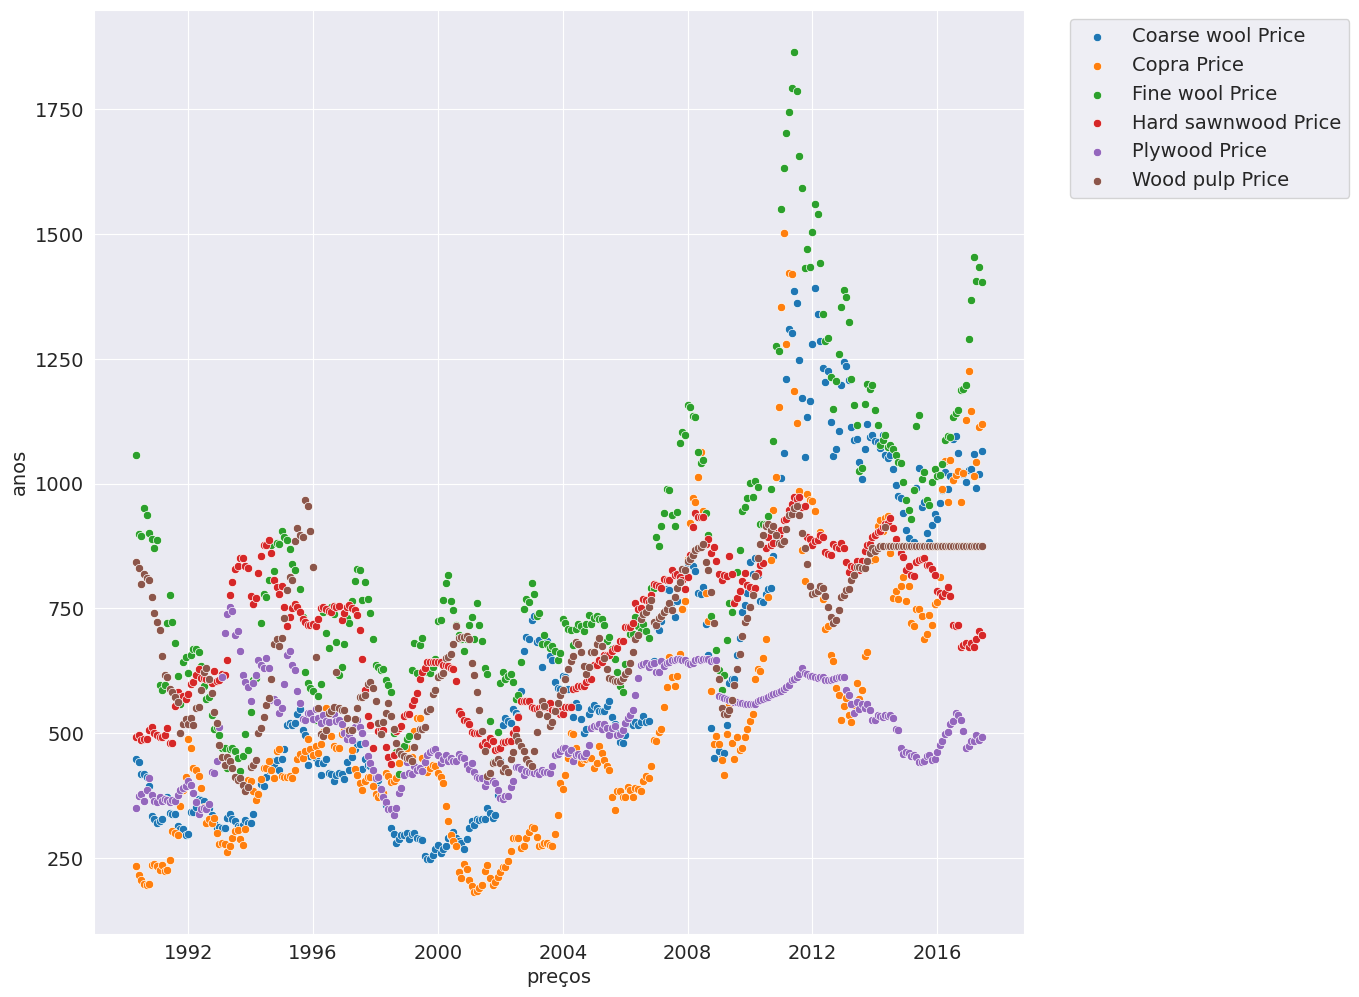

In [76]:
altoCusto=["Coarse wool Price", "Copra Price", "Fine wool Price",
          "Hard sawnwood Price", "Plywood Price", "Wood pulp Price"]

plt.figure(figsize=(12,12))
plt.xlabel("preços")
plt.ylabel("anos")
for i in range(len(altoCusto)):
  sns.scatterplot(y=df[altoCusto[i]], x=df.index);
  plt.legend(altoCusto,loc='upper center',bbox_to_anchor=(1.2,1))


Podemos observar que a madeira fina foi a matéria-prima de aumento mais drastico.